In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns

In [2]:
file_path_2020 = '2020_survey_data.csv'
df20 = pd.read_csv(file_path_2020)

# 0. Features 분류

### Features를 아래와 같이 분류합니다:

   - 1. 건강상태 관련 (B. 건강상태와 건강행태, C: 기능상태와 간병수발, I: 인지기능)
   - 2. 가족관계 관련 (A: 가구일반, F: 가족 및 사회관계, G: 가족간 도움교환)
   - 3. 노후생활 관련 (D: 여가 및 사회활동, H: 생활과 노후생활)
   - 4. 경제상태 관련 (E. 경제활동, J. 경제상태)

# 1. 건강상태 관련 (B. 건강상태와 건강행태, C: 기능상태와 간병수발, I: 인지기능)



1. B1 평소의 건강상태 (1에서 5 점차 나빠짐. 9는 결측치) (9: 177개)
2. B2_3 의사진단 만성질환 총 수
3. B2_2L_{1-32} 만성질환 i 유무 (예: 1, 아니오: 2) 
    - B2_2L_1 의사진단 만성질환 유무_고혈압
    - B2_2L_2 의사진단 만성질환 유무_뇌졸중(중풍, 뇌경색)
    - ...
5. B3 현재 3개월 이상 복용하고 있는 의사처방약(종류수)
6. B4 지난 1개월 동안 의료기관 이용 여부 (1:있다, 2: 없다)
7. B4_1_etc 지난 1개월 동안 의료기관 이용시 횟수 (99 비해당 -> 0으로 바꿔야 함)
9. B5_1_etc_1 지난 1년 간 병원 입원시 횟수_요양병원 (99 비해당 -> 0으로 바꿔야 함): 확인 결과 1번 이상 없음. 
10. B5_1_etc_2 지난 1년 간 병원 입원시 일수_요양병원	(999 비해당 -> 0으로 바꿔야 함)
12. B5_2_etc_1 지난 1년 간 병원 입원시 횟수_그 외 병의원 (99 비해당 -> 0으로 바꿔야 함)
13. B5_2_etc_2 지난 1년 간 병원 입원시 일수_그 외 병의원 (999 비해당 -> 0으로 바꿔야 함)
14. B6_{1_15}: 우울증 척도 (1: 예, 2: 아니오, 9 비해당)
    - B6_1 우울증척도_현재생활 만족
    - B6_2 우울증척도_의욕저하
    - ...
    - *note: 1, 5, 11, 13번 문항: 긍정 질문 (예: 현재에 만족하십니까?) | 그외: 부정 질문*
15. B7 현재 흡연 여부 (예: 1, 아니오: 2)
16. B8 지난 1년 간 음주 빈도 (0:1년간 안 마심) -> 7: 매일, 비해당: 99 (확인 결과 비해당 없음)
17. B8_1a	음주 시 평균 음주량(잔) (99: 비해당 -> 0으로 바꿔야 함)
18. B9 평소 운동 여부 (1:예, 2: 아니요)
19. B9_1a	주당 운동 일수 (9: 비해당 -> 0으로 바꿔야 함)
20. B9_2a	운동 시간(분) (999: 비해당 -> 0으로 바꿔야 함)
21. B9_3a 주당 운동 일수 x 운동시간 (B9_1a x B9_2a)
21. B10_1 몸무게 (998: 모름/무응답) (998: 14개)
22. B10_3 키 (998: 모름/무응답) (998: 17개)
23. B10_BMI 몸무게/키
23. B11_{1-10}: 영양 관리 상태 (1: 그렇다 2: 아니다)
    - B11_1 영양관리_음식의 양, 종류 조절
    - B11_2	영양관리_하루 2끼 미만
    - ...
24. C1_1 보조기 사용 여부_시력 (1:예(사용), 2: 아니요(미사용))
25. C2_1 보조기 사용 여부_청력 (1:예(사용), 2: 아니요(미사용))
26. C3_1 보조기 사용 여부_씹기 (1:예(사용), 2: 아니요(미사용))
27. C1_2 일상생활의 불편함_시력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
28. C2_2 일상생활의 불편함_청력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
29. C3_2 일상생활의 불편함_씹기 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
30. C4 근력상태_의자나 침대에 앉았다가 일어나기 5회 반복	(1:수행함 2:시도했으나 수행못함 3:수행 시도조차 못 하는 상태, 9:지금 하고싶지 않음 (486개))
31. C5_{1-6}: 동작수행 어려움 (1:전혀 어렵지 않다, 2:약간 어렵다, 3:매우 어렵다, 4:전혀 할 수 없다 5: 모르겠다)
    - C5_1 동작수행 어려움_운동장 한 바퀴(400m)정도 뛰기
    - C5_2 동작수행 어려움_운동장 한 바퀴(400m)정도 걷기
    - C5_3 동작수행 어려움_쉬지않고 10계단 오르기
    - ...
32. C6_{1-7} 도움 필요 여부 (1:완전 자립, 2:부분 도움,3:완전 도움)
33. C7_1_{1-7} 도움 필요 여부 (1:완전 자립, 2:부분 도움,3:완전 도움)
34. C7_2_{8-10} 도움 필요 여부 (1:완전 자립, 2:적은 부분 도움,3:많은 부분 도움,4:완전 도움)
    - C6_1 ADL_옷입기(옷 꺼내기, 단추, 지퍼, 벨트)
    - C7_1_1 IADL_몸단장(빗질, 화장, 면도, 손톱ㆍ발톱 깎기)
    - C7_2_8 IADL_물건 구매 결정, 돈 지불, 거스름돈 받기
    - ...
36. C10_1_2	장애정도 (1:심한 장애인(1-3급), 2:심하지 않은 장애인(4-6급), 9: 비해당 (비장애인))
37. I1x1 인지기능_총점 (99: 비해당)

#### B1 평소의 건강상태 (1에서 5 점차 나빠짐. 9는 결측치) (9: 177개)
 - 결측치 제외 평균치로 대체합니다.

In [4]:
mean_value = df20.loc[df20['B1'] != 9, 'B1'].mean()
df20['B1'] = df20['B1'].replace(9, mean_value)

#### B2_2L_{1-32} 만성질환 i 유무 (예: 1, 아니오: 2)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [5]:
cols = [col for col in df20.columns if col.startswith('B2_2L_')]
for col in cols:
    df20[col] = df20[col].replace(2, 0)

#### B4 지난 1개월 동안 의료기관 이용 여부 (1:있다, 2: 없다)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [6]:
df20['B4'] = df20['B4'].replace(2, 0)

#### B4_1_etc 지난 1개월 동안 의료기관 이용시 횟수 (99 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [7]:
df20['B4_1_etc'] = df20['B4_1_etc'].replace(99, 0)

#### B5_1_etc_1 지난 1년 간 병원 입원시 횟수_요양병원 (99 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [8]:
df20['B5_1_etc_1'] = df20['B5_1_etc_1'].replace(99, 0)

#### B5_1_etc_2 지난 1년 간 병원 입원시 일수_요양병원	(999 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 999에서 0으로 바꿔줍니다.

In [9]:
df20['B5_1_etc_2'] = df20['B5_1_etc_2'].replace(999, 0)

#### B5_2_etc_1 지난 1년 간 병원 입원시 횟수_그 외 병의원 (99 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [10]:
df20['B5_2_etc_1'] = df20['B5_2_etc_1'].replace(99, 0)

#### B5_2_etc_2 지난 1년 간 병원 입원시 일수_그 외 병의원 (999 비해당 -> 0으로 바꿔야 함)

In [11]:
df20['B5_2_etc_2'] = df20['B5_2_etc_2'].replace(999, 0)

#### B6_{1_15}: 우울증 척도 (1: 예, 2: 아니오, 9 비해당)
 - 1. 제 1, 5, 11, 13번 문항: "예"의 값을 1에서 0으로, "아니오"의 값을 2에서 1로 바꿔줍니다.
 - 2. 나머지 문항: "아니오"의 값을 2에서 0으로 바꿔줍니다.
 - 3. 비해당의 값을 9에서 결측치 제외 평균으로 바꿔줍니다. <결측치 177개는 제거하지 않습니다>

In [12]:
# Columns where 'yes' is changed from 1 to 0 and 'no' is changed from 2 to 1
for col in ['B6_1', 'B6_5', 'B6_11', 'B6_13']:
    df20[col] = df20[col].replace({1:0, 2:1})

# For all 'B6_' columns, 'no' is changed from 2 to 0
for col in df20.columns:
    if col.startswith('B6_') and col not in ['B6_1', 'B6_5', 'B6_11', 'B6_13']:
        df20[col] = df20[col].replace(2, 0)

# For all 'B6_' columns, 'not applicable' is changed from 9 to mean excluding 9
for col in df20.columns:
    if col.startswith('B6_'):
        mean_value = df20.loc[df20[col] != 9, col].mean()
        df20[col] = df20[col].replace(9, mean_value)


#### B7 현재 흡연 여부 (예: 1, 아니오: 2)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [13]:
df20['B7'] = df20['B7'].replace(2, 0)

#### B8_1a 음주 시 평균 음주량(잔) (99: 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [14]:
df20['B8_1a'] = df20['B8_1a'].replace(99, 0)

#### B9 평소 운동 여부 (1:예, 2: 아니요)
 -  아니오의 값을 2에서 0으로 바꿔줍니다.
 

In [15]:
df20['B9'] = df20['B9'].replace(2, 0)

#### B9_1a 주당 운동 일수 (9: 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 9에서 0으로 바꿔줍니다.

In [16]:
df20['B9_1a'] = df20['B9_1a'].replace(9, 0)

#### B9_2a 운동 시간(분) (999: 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 999에서 0으로 바꿔줍니다.

In [17]:
df20['B9_2a'] = df20['B9_2a'].replace(999, 0)

#### B9_3a 주당 운동 일수 x 운동시간 (B9_1a x B9_2a)
 - B9_1a와 B9_2a를 곱해줍니다. 

In [18]:
df20['B9_3a'] = df20['B9_1a'] * df20['B9_2a']

#### B10_1 몸무게 (998: 모름/무응답) (998: 14개)
 - 결측치를 998에서 평균치로 바꿔줍니다.

In [19]:
mean_value = df20.loc[df20['B10_1'] != 998, 'B10_1'].mean()
df20['B10_1'] = df20['B10_1'].replace(998, mean_value)

#### B10_3 키 (998: 모름/무응답) (998: 17개)
 - 결측치를 998에서 평균치로 바꿔줍니다.

In [20]:
mean_value = df20.loc[df20['B10_3'] != 998, 'B10_3'].mean()
df20['B10_3'] = df20['B10_3'].replace(998, mean_value)

#### B10_BMI: 몸무게/키

In [21]:
df20['B10_BMI'] = df20['B10_1'] / df20['B10_3']

#### B11_{1-10}: 영양 관리 상태 (1: 그렇다 2: 아니다)
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [22]:
cols = [col for col in df20.columns if col.startswith('B11_')]
for col in cols:
    df20[col] = df20[col].replace(2, 0)

#### C1_1 보조기 사용 여부_시력 (1:예(사용), 2: 아니요(미사용))
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

#### C2_1 보조기 사용 여부_청력 (1:예(사용), 2: 아니요(미사용))
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

#### C3_1 보조기 사용 여부_씹기 (1:예(사용), 2: 아니요(미사용))
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [23]:
cols = ['C1_1', 'C2_1', 'C3_1']
for col in cols:
    df20[col] = df20[col].replace(2, 0)

#### C1_2 일상생활의 불편함_시력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
#### C2_2 일상생활의 불편함_청력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
#### C3_2 일상생활의 불편함_씹기 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))

In [24]:
mean_value = df20.loc[df20['C1_2'] != 9, 'C1_2'].mean()
df20['C1_2'] = df20['C1_2'].replace(9, mean_value)
mean_value = df20.loc[df20['C2_2'] != 9, 'C2_2'].mean()
df20['C2_2'] = df20['C2_2'].replace(9, mean_value)
mean_value = df20.loc[df20['C3_2'] != 9, 'C3_2'].mean()
df20['C3_2'] = df20['C3_2'].replace(9, mean_value)

#### C4 근력상태_의자나 침대에 앉았다가 일어나기 5회 반복	(1:수행함 2:시도했으나 수행못함 3:수행 시도조차 못 하는 상태, 9:지금 하고싶지 않음 (486개))
 - 결측치의 값을 9에서 평균값으로 바꿔줍니다.

In [25]:
mean_value = df20.loc[df20['C4'] != 9, 'C4'].mean()
df20['C4'] = df20['C4'].replace(9, mean_value)

#### C5_{1-6} 동작수행 어려움 (1:전혀 어렵지 않다, 2:약간 어렵다, 3:매우 어렵다, 4:전혀 할 수 없다 5: 모르겠다)

In [26]:
cols = [col for col in df20.columns if col.startswith('C5_')]
for col in cols:
    mean_value = df20.loc[df20[col] != 5, col].mean()
    df20[col] = df20[col].replace(5, mean_value)

#### C10_1_2 장애정도 (1:심한 장애인(1-3급),  2:심하지 않은 장애인(4-6급), 9: 비해당) 
 - 비장애인의 값을 9에서 0으로 바꿔줍니다
 - 1~3급 장애인의 값을 1에서 2로 바꿔줍니다.
 - 4~6급 장애인의 값을 2에서 1로 바꿔줍니다. 

In [27]:
df20['C10_1_2'] = df20['C10_1_2'].replace({9:0, 1:2, 2:1})

#### I1x1 인지기능_총점 (99: 비해당)
 - 비해당의 값을 99에서 평균치로 바꿔줍니다.

In [28]:
mean_value = df20.loc[df20['I1x1'] != 99, 'I1x1'].mean()
df20['I1x1'] = df20['I1x1'].replace(99, mean_value)

## 건강상태관련 features 정리

앞선 것과 같이 정리한 건강상태관련 features는 아래와 같습니다:

In [30]:
# 모든 건강상태관련 features
health_features = ['B1',
                   'B2_3','B2_2L_1','B2_2L_2','B2_2L_3','B2_2L_4','B2_2L_5','B2_2L_6','B2_2L_7','B2_2L_8','B2_2L_9','B2_2L_10','B2_2L_11','B2_2L_12','B2_2L_13','B2_2L_14','B2_2L_15','B2_2L_16','B2_2L_17','B2_2L_18','B2_2L_19','B2_2L_20','B2_2L_21','B2_2L_22','B2_2L_23','B2_2L_24','B2_2L_25','B2_2L_26','B2_2L_27','B2_2L_28','B2_2L_29','B2_2L_30','B2_2L_31','B2_2L_32',
                   'B3',
                   'B4','B4_1_etc',
                   'B5_1_etc_1','B5_1_etc_2','B5_2_etc_1','B5_2_etc_2',
                   'B6_1','B6_2','B6_3','B6_4','B6_5','B6_6','B6_7','B6_8','B6_9','B6_10','B6_11','B6_12','B6_13','B6_14','B6_15',
                   'B7',
                   'B8','B8_1a',
                   'B9','B9_1a','B9_2a','B9_3a',
                   'B10_1','B10_3','B10_BMI',
                   'B11_1','B11_2','B11_3_1','B11_3_2','B11_3_3','B11_4','B11_5','B11_6','B11_7','B11_8','B11_9','B11_10',
                   'C1_1','C2_1','C3_1','C1_2','C2_2','C3_2',
                   'C4',
                   'C5_1','C5_2','C5_3','C5_4','C5_5','C5_6',
                   'C6_1','C6_2','C6_3','C6_4','C6_5','C6_6','C6_7',
                   'C7_1_1','C7_1_2','C7_1_3','C7_1_4','C7_1_5','C7_1_6','C7_1_7','C7_2_8','C7_2_9','C7_2_10',
                   'C10_1_2',
                   'I1x1'
                  ]


features의 총 갯수를 살펴보았습니다.

In [31]:
len(health_features)

110

110

건강관련 features는 총 110개입니다.

### 제거를 고려할 features는 아래와 같습니다.

1. 의사진단 만성질환 총 수 (B2_3): 각각의 문항에 대한 결과가 포함되었기 때문에, 총 질환 수는 제외해도 될 것 같습니다.
2. 운동 관련 수치 (B9_1a, B9_2a, B9_3a): B9_3a만 포함해도 될 것 같습니다.
    - B9_1a 주당 운동 일수
    - B9_2a 운동 시간(분)
    - B9_3a 주당 운동 일수 x 운동시간
3. 몸무게와 키 수치 (B10_1, B10_3, B10_BMI): BMI만 포함해도 될 것 같습니다
    - B10_1 몸무게
    - B10_3 키
    - B10_BMI 몸무게/키
    
이를 고려했을 때, 제거할 features는 아래와 같습니다:

In [32]:
health_features_to_delete = ['B2_3','B9_1a','B9_2a','B10_1','B10_3']

#### 여기서 질문:
아래와 같은 문항들이 있습니다:
 - B2_2L_{1-32}: 만성질환 i 유무
 - B6_{1_15} 우울증척도
 - B11_{1-10} 영양 관리 상태
 - C{1-3}_1 보조기 사용 여부 (시력,청력,씹기)
 - C{1-3}_2 일생생활의 불편함 (시력,청력,씹기)
 - C5_{1-6}: 동작수행 어려움
 - C6_{1-7}: 도움 필요 여부
 - C7_1_{1-7} 도움 필요 여부 
 - C7_2_{8-10}: 도움 필요 여부 

이런 데이터는 모든 문항들을 넣는 것이 나을까요, 아니면 총점을 포함하는 것이 나을까요?
일단 아래와 같이 합을 만들어놓았습니다:

#### B2_3: B2_2L_{1-32}의 합 <만성질환 갯수>
 - 이미 있음 

#### B6_SUM: B6_{1_15} 의 합 <우울증 척도 총합>

In [33]:
df20['B6_SUM'] = df20[['B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B6_8', 'B6_9', 'B6_10', 'B6_11', 'B6_12', 'B6_13', 'B6_14', 'B6_15']].sum(axis=1)

#### B11_SUM: B11_{1-10}의 합 <영양관리상태 총합> 

In [34]:
df20['B11_SUM'] = df20[['B11_1','B11_2','B11_3_1','B11_3_2','B11_3_3','B11_4','B11_5','B11_6','B11_7','B11_8','B11_9','B11_10']].sum(axis=1)

#### C_SUM_1: C{1-3}_1의 합 <보조기 사용 여부 (시력, 청력, 씹기)총합>
#### C_SUM_2: C{1-3}_2의 합 <일상생활 불편함 (시력, 청력, 씹기)총합>

In [35]:
df20['C_SUM_1'] = df20[['C1_1','C2_1','C3_1']].sum(axis=1)
df20['C_SUM_2'] = df20[['C1_2','C2_2','C3_2']].sum(axis=1)

#### C5_SUM: C5_{1-6}의 합 <동작수행 어려움 총합>

In [36]:
df20['C5_SUM'] = df20[['C5_1','C5_2','C5_3','C5_4','C5_5','C5_6']].sum(axis=1)

In [37]:
C_6_7_SUM = df20

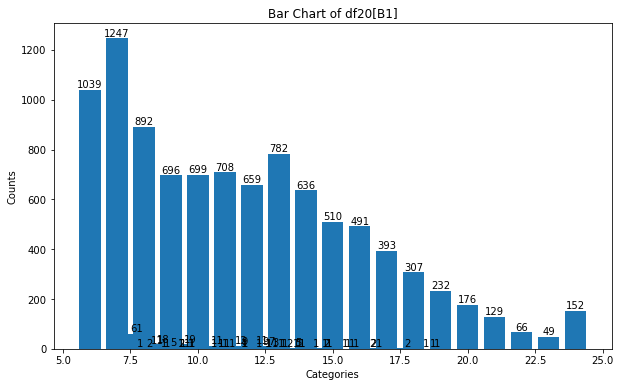

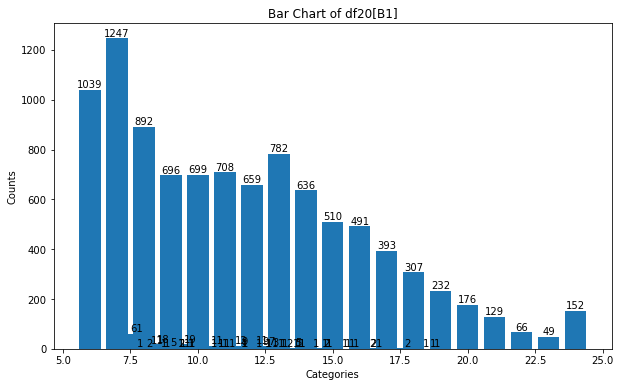

In [38]:
values = df20['C5_SUM'].value_counts()
labels = values.index

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values)

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.title('Bar Chart of df20[B1]')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

In [39]:
# 결측치 제거
df20 = df20[df20['B1'] != 9]

In [40]:
df20['B5_1_etc_2'].describe()

count    10097.000000
mean         0.148856
std          4.935191
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        365.000000
Name: B5_1_etc_2, dtype: float64

count    10097.000000
mean         0.148856
std          4.935191
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        365.000000
Name: B5_1_etc_2, dtype: float64